In [14]:
import pandas as pd
from IPython.display import display

from graphing import *
import numpy as np
from matplotlib import pyplot as plt

import re



In [15]:


def shiftTimeStamp(row):
    return row['timeStamp'] - 1688695066761

df = pd.read_csv('day0.csv')
df['modTimeStamp'] = df.apply(shiftTimeStamp, axis=1)

tests = Test(df)

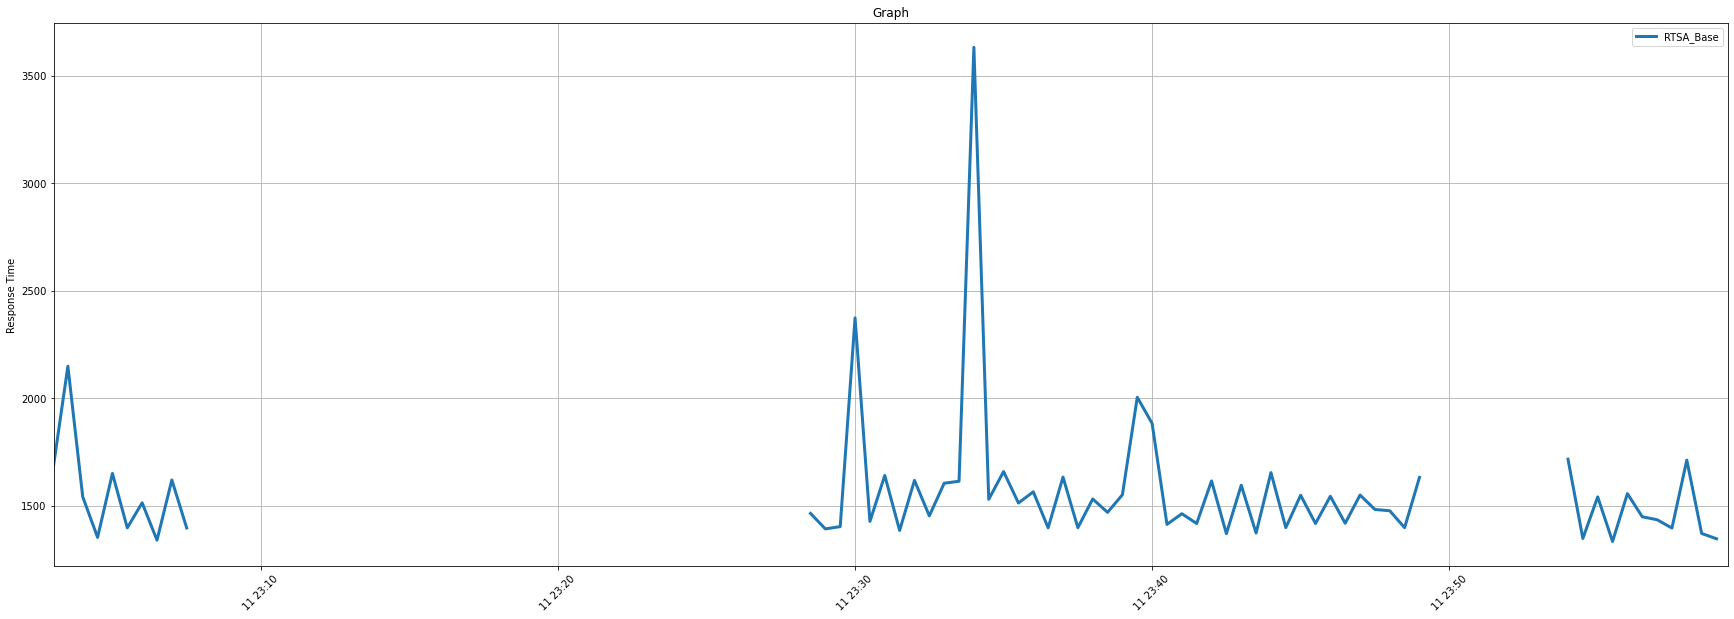

In [16]:
tests.time_series_unit('RTSA_Base')

In [17]:
labels=tests.results['label'].unique()

In [18]:

base_regex = re.compile(r'.*_Base$')

base = [item for item in labels if re.match(base_regex, item)]
tokens = [item for item in labels if item.startswith('Token_')]
main = [i for i in labels if (not re.match(base_regex,i)) and (not i.startswith('Token_'))]

print(base)
print(tokens)
print(main)

['TnT_Base', 'RTSA_EDD_Base', 'RTSA_Base', 'SalesOrder_Base', 'QSL_Base']
['Token_RTSA', 'Token_SalesOrder', 'Token_QSL', 'Token_WG', 'Token_TnT']
['RTSA_25th_MAX', 'RTSA_EDD_25th_MAX', 'RTSA_75th_MAX', 'RTSA_EDD_75th_MAX', 'SalesOrder_1500', 'SalesOrder_4500', 'TnT_10Th_MAX', 'QSL_200', 'RTSA_50Th_MAX', 'SalesOrder_5th_MAX']


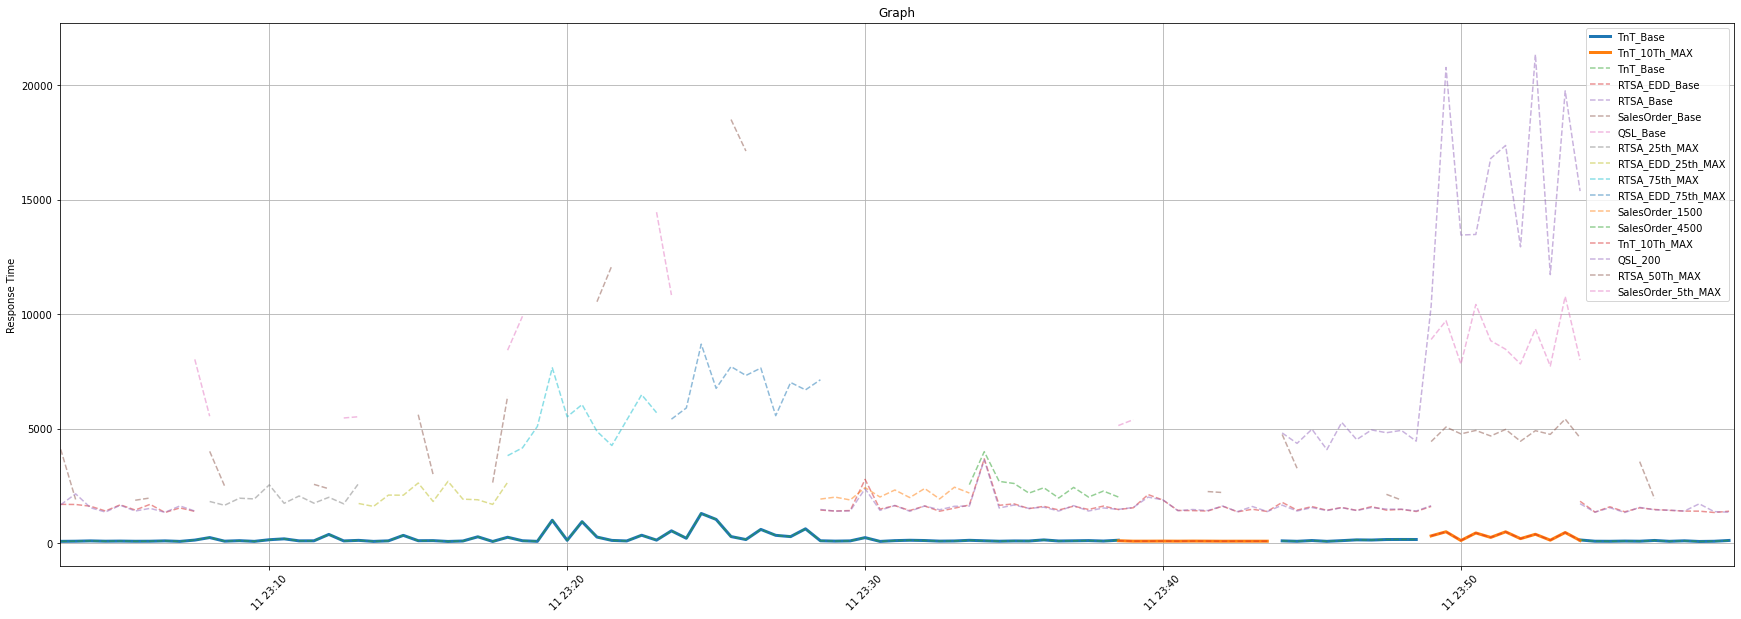

In [52]:
tests.time_series_by_labels(TnT, main + base)

In [30]:
RTSA = [item for item in labels if (item.startswith('RTSA_') and not item.startswith('RTSA_E'))]
RTSA_EDD = [item for item in labels if item.startswith('RTSA_EDD')]
TnT = [item for item in labels if item.startswith('TnT_')]
SalesOrder = [item for item in labels if item.startswith('SalesOrder_')]
QSL = [item for item in labels if item.startswith('QSL_')]
WG = [item for item in labels if item.startswith('WG_')]
labels_dict = {'RTSA': RTSA,'RTSA_EDD':RTSA_EDD, "TnT": TnT, 'SalesOrder':SalesOrder, 'QSL': QSL, 'WG':WG }

In [39]:
def time_series_highlight(tests, focus_cat, labels_dict):
    focus = labels_dict.get(i)
    print(focus.flatten())
    bg = [labels_dict.get(i) for i in labels_dict.keys() if i not in focus]
    return tests.time_series_by_labels(focus,bg)
    
    

In [40]:
time_series_highlight(tests,'RTSA',labels_dict)

AttributeError: 'list' object has no attribute 'flatten'

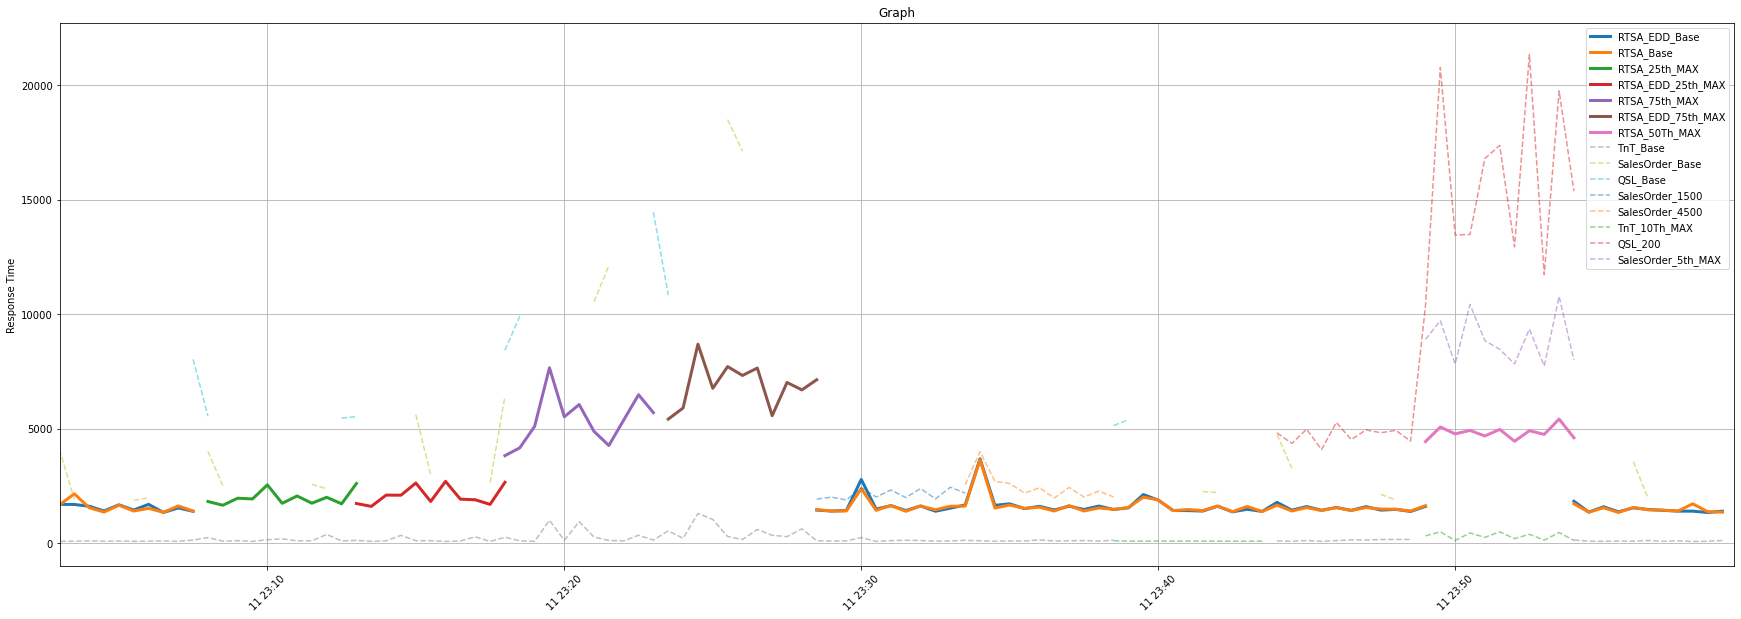

In [44]:
tests.time_series_by_labels(RTSA+RTSA_EDD ,SalesOrder+TnT+WG+QSL )

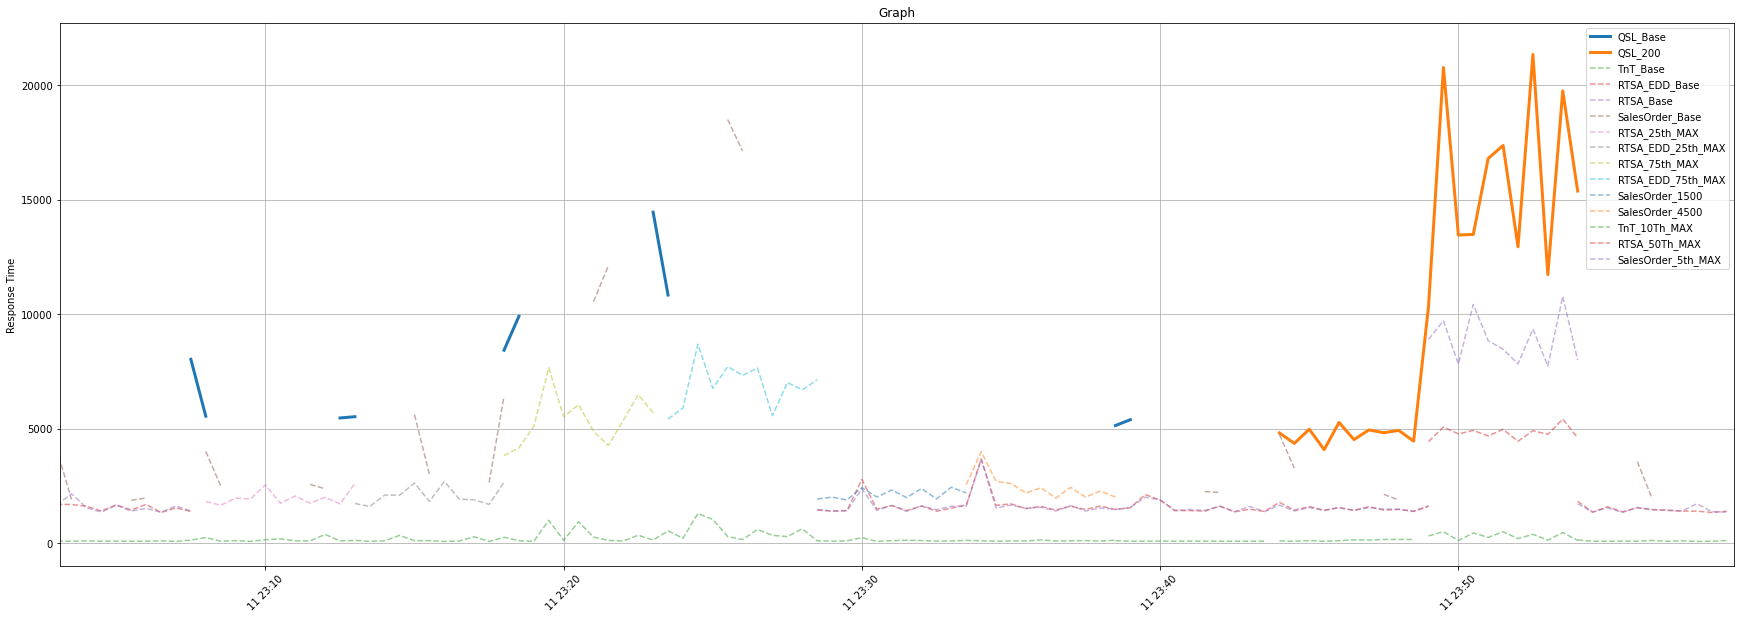

In [45]:
tests.time_series_by_labels(QSL ,SalesOrder+TnT+WG+RTSA+RTSA_EDD )

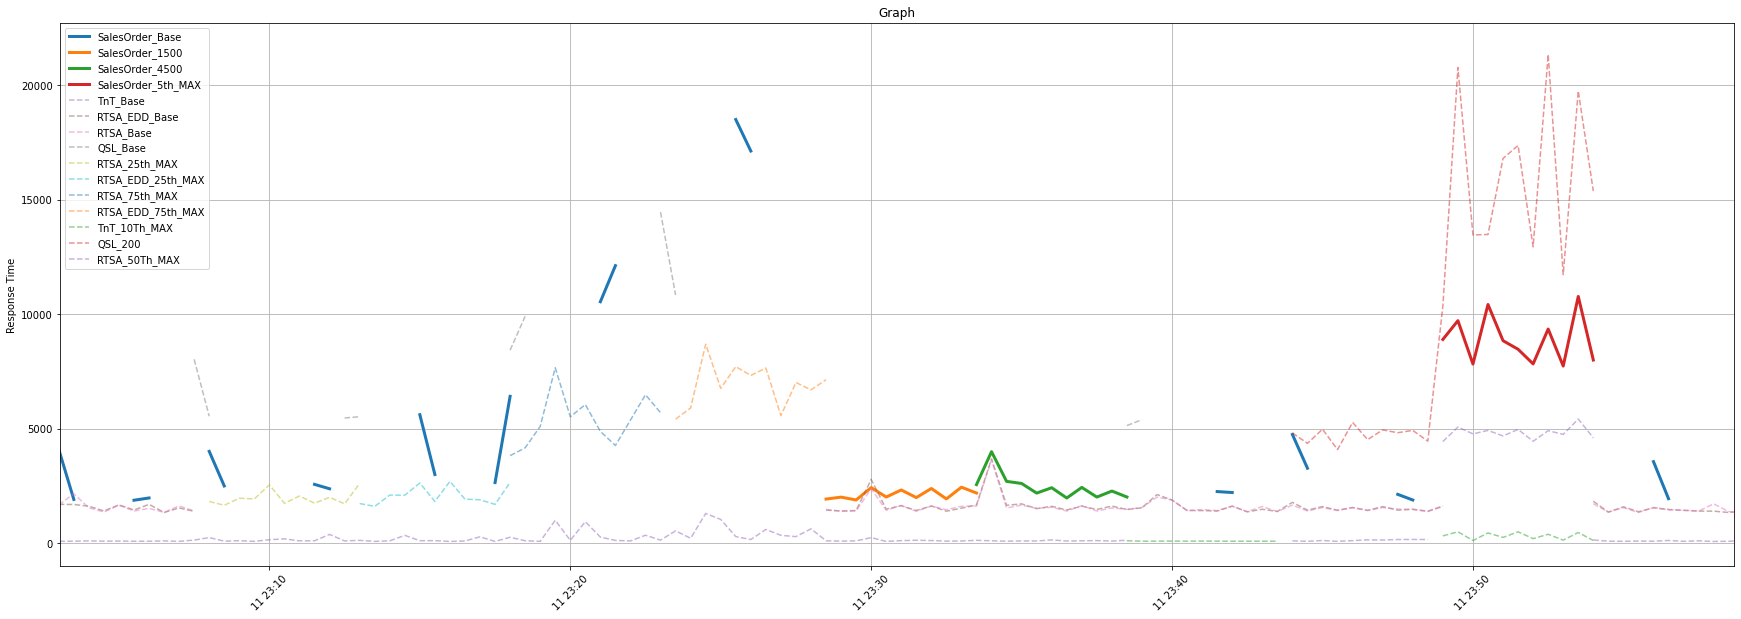

In [47]:
tests.time_series_by_labels(SalesOrder, TnT+QSL+RTSA+RTSA_EDD)

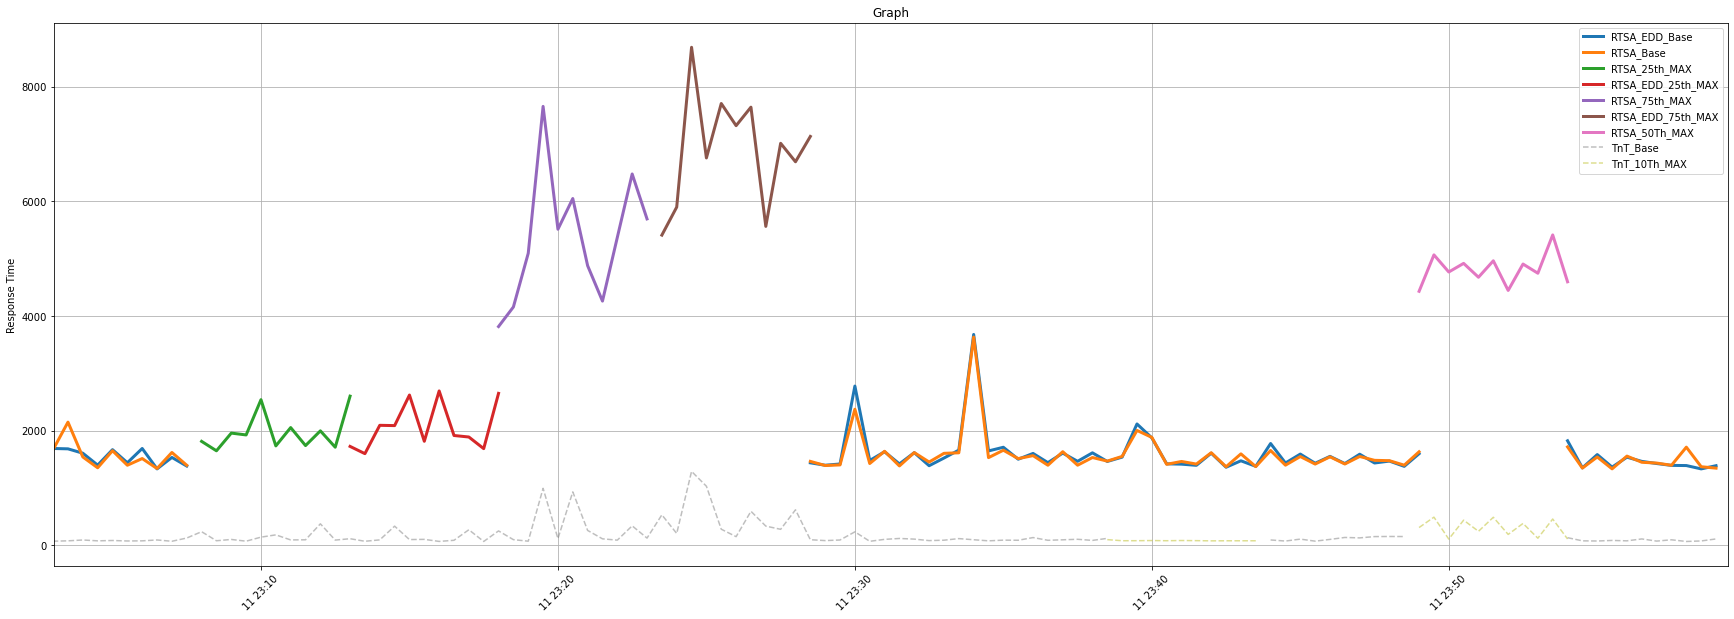

In [24]:
tests.time_series_by_category('RTSA', 'TnT')

TypeError: 'list' object is not callable

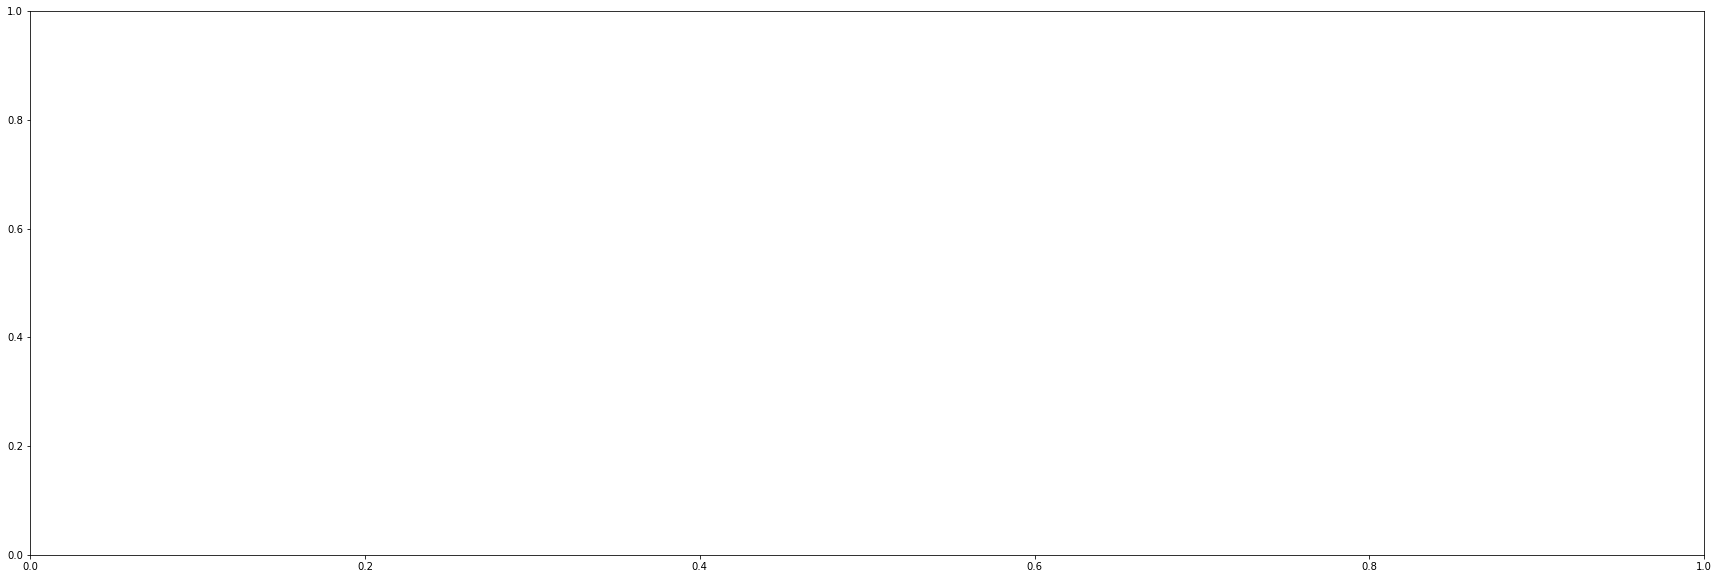

In [72]:
other = pd.read_csv('SCM-3 and lz.csv')
unique_labels = other['integration'].unique()

# Create a dictionary to store the dataframes
LZ_To_FS = other[other['integration']=='TPG-R2-L008-SCH']
SCM_3 = other[other['integration']== 'TPG-R2-L008A']
SCM_3.head()


,integration,Time,RunTime,Unnamed: 3
11,TPG-R2-L008A,10:25:00,0.0,NaN
12,TPG-R2-L008A,10:14:59,13.0,NaN
13,TPG-R2-L008A,10:05:00,16.0,NaN
14,TPG-R2-L008A,9:54:56,9.0,NaN
15,TPG-R2-L008A,9:44:56,17.0,NaN


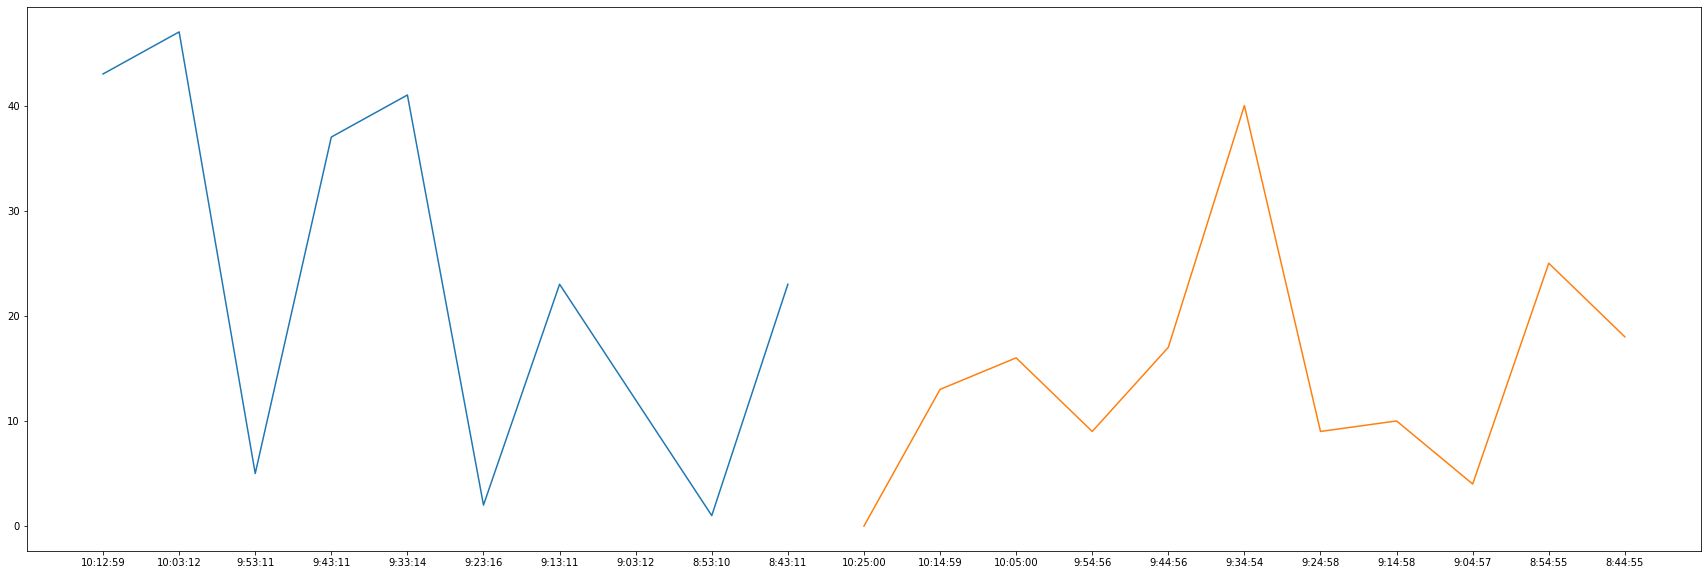

In [70]:
plt.rcParams["figure.figsize"] = [30, 10]

fig, ax = plt.subplots()

ax.plot(LZ_To_FS['Time'], LZ_To_FS['RunTime'], label='LZ to FS')
ax.plot(SCM_3['Time'], SCM_3['RunTime'], label='SCM-3')

TPG-R2-L008-SCH
TPG-R2-L008A


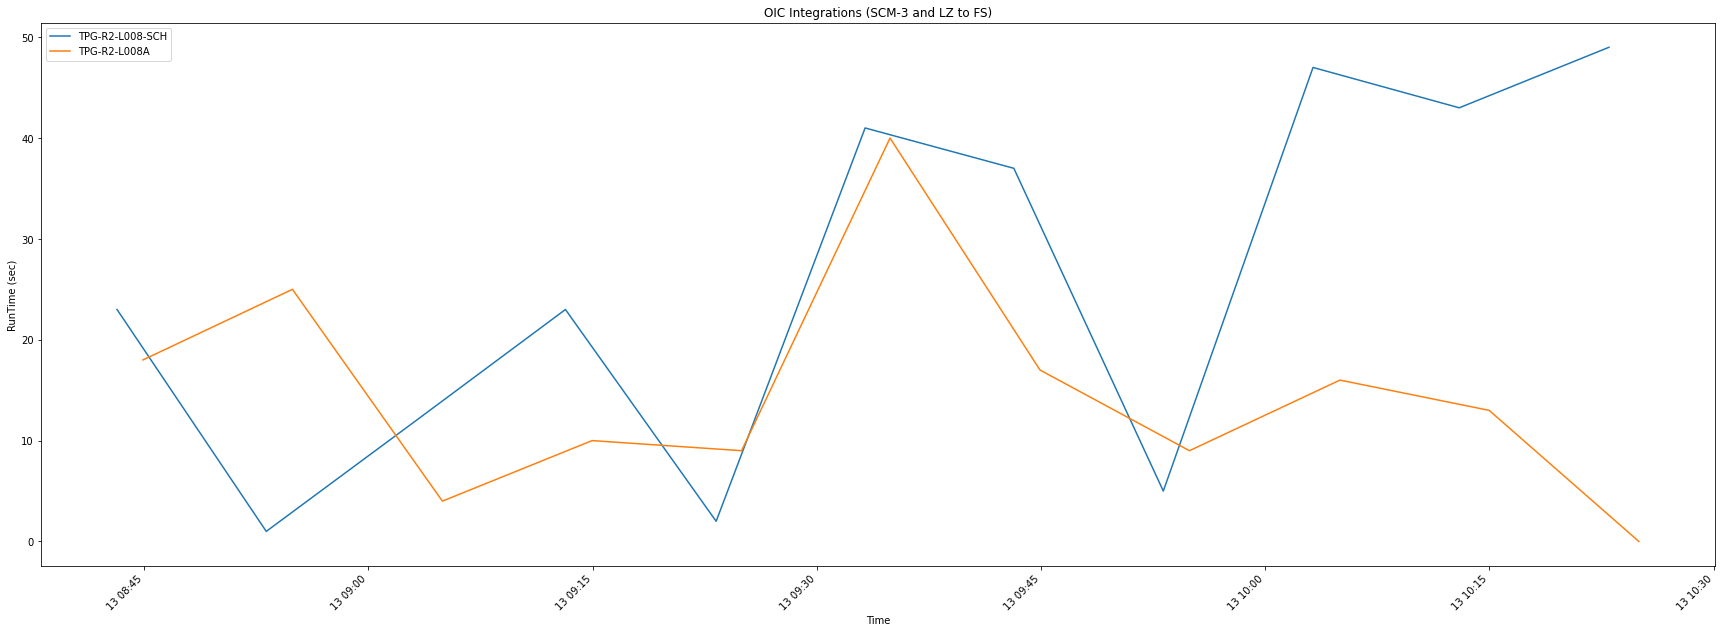

In [73]:
other['Time'] = pd.to_datetime(other['Time'])
other.sort_values(by = 'Time', inplace=True)
# Group the data by 'integration' and plot the 'RunTime' over time
fig, ax = plt.subplots(figsize=(30, 10))

for integration, data in other.groupby('integration'):
    print(integration)
    ax.plot(data['Time'], data['RunTime'], label=integration)

# Set the x-axis label, y-axis label, and plot title
ax.set_xlabel('Time')
ax.set_ylabel('RunTime (sec)')
ax.set_title('OIC Integrations (SCM-3 and LZ to FS)')

# Add a legend
ax.legend()

# Rotate and align the x-axis tick labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()